# 02 — Exploratory Data Analysis (EDA)

This notebook explores the cleaned dataset and produces basic plots.

**Note**: Plots are generated using matplotlib (no seaborn).

In [24]:
# 02 — Exploratory Data Analysis (EDA)
# This notebook explores the cleaned dataset and produces basic plots (matplotlib only).

import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make project root importable so we can use src/
project_root = Path.cwd().parent if (Path.cwd() / "02_eda.ipynb").exists() else Path.cwd()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Try importing visualization helpers (support both 'src.visualization' and direct 'visualization')
try:
    from src.visualization import (
        plot_target_distribution,
        plot_numeric_histograms,
        boxplot_numeric_by_target,
        correlation_heatmap,
        monthly_deposit_rate,
    )
except ModuleNotFoundError:
    sys.path.append(str(project_root / "src"))
    from visualization import (
        plot_target_distribution,
        plot_numeric_histograms,
        boxplot_numeric_by_target,
        correlation_heatmap,
        monthly_deposit_rate,
    )

RAW = Path("../data/bank.csv")
CLEAN = Path("../data/bank_cleaned.csv")

print("RAW path:", RAW.resolve())
print("CLEAN path:", CLEAN.resolve())


RAW path: /Users/camille/bank-marketing-analysis/data/bank.csv
CLEAN path: /Users/camille/bank-marketing-analysis/data/bank_cleaned.csv


In [25]:
if not RAW.exists():
    raise FileNotFoundError(f"Missing raw CSV at {RAW}. Place your Kaggle file at ../data/bank.csv")
if not CLEAN.exists():
    raise FileNotFoundError(f"Missing cleaned CSV at {CLEAN}. Run 01_data_preprocessing.ipynb first.")

original_df = pd.read_csv(RAW)
df = pd.read_csv(CLEAN)

print("Raw shape:", original_df.shape)
print("Clean shape:", df.shape)

display(original_df.head())
display(df.head())


Raw shape: (11162, 17)
Clean shape: (11162, 39)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,NaN,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,NaN,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,NaN,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,NaN,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,NaN,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Target Distribution

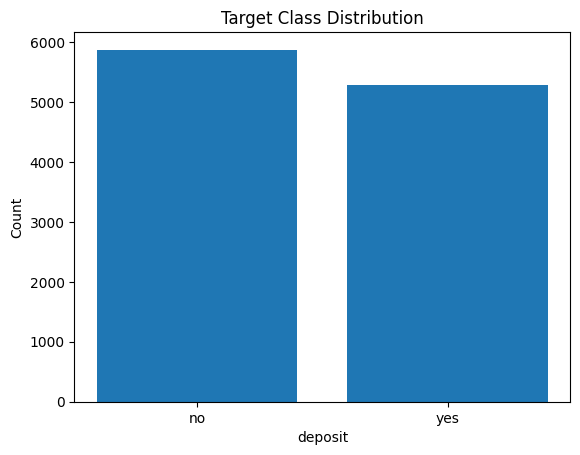

In [26]:
plot_target_distribution(original_df, 'deposit')

## Numeric Histograms

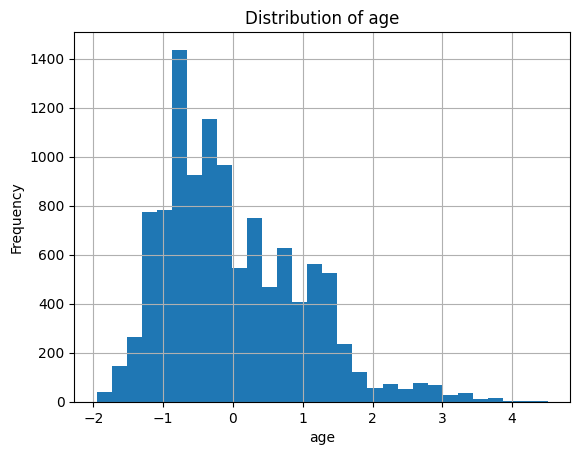

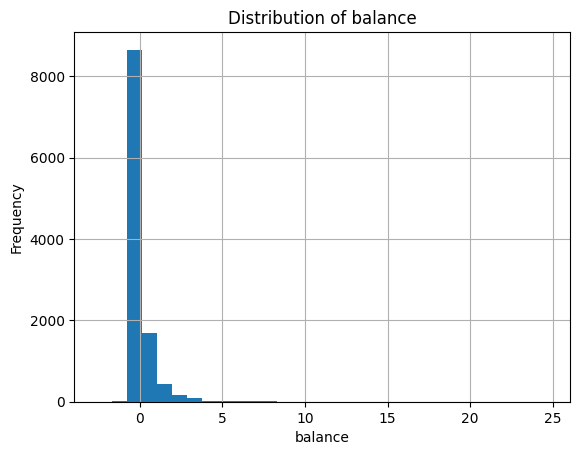

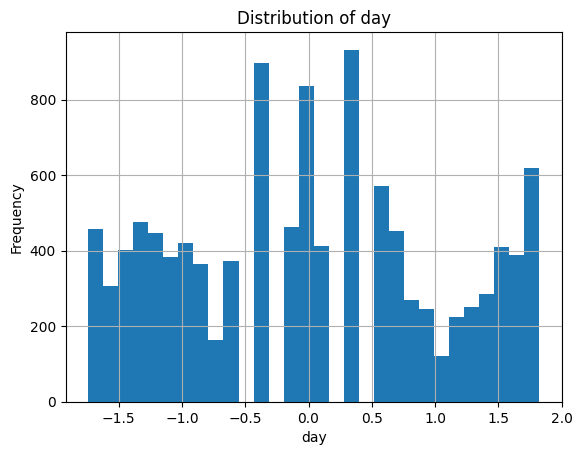

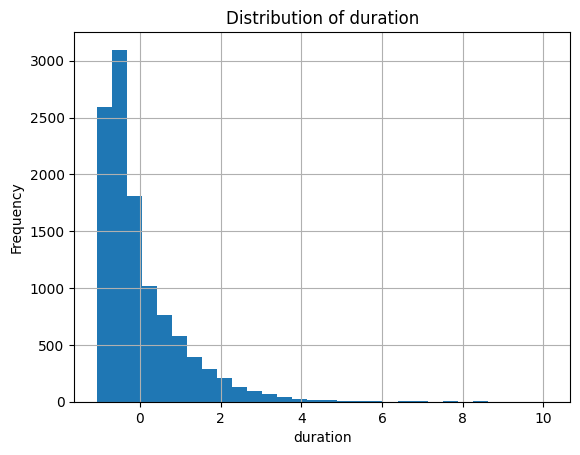

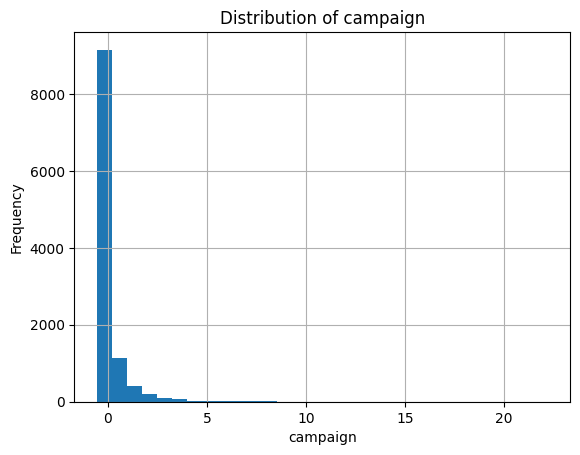

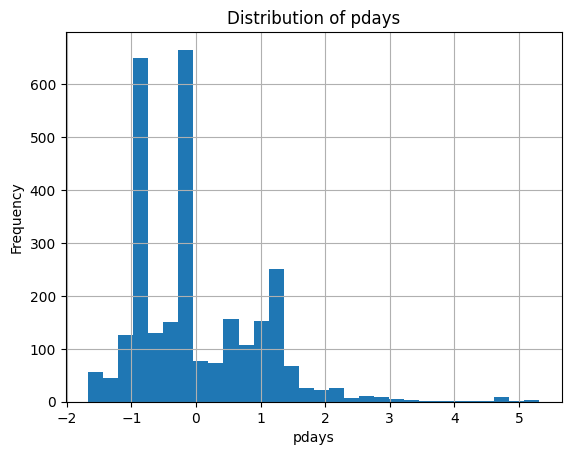

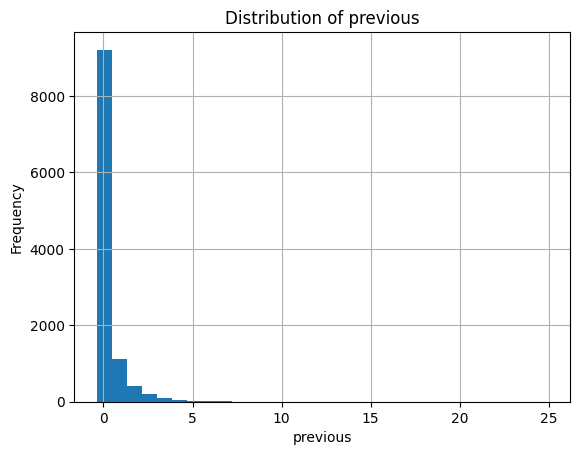

In [27]:
numeric_cols = [c for c in ['age','balance','day','duration','campaign','pdays','previous'] if c in df.columns]
plot_numeric_histograms(df, numeric_cols)

## Boxplots: Numeric vs Target

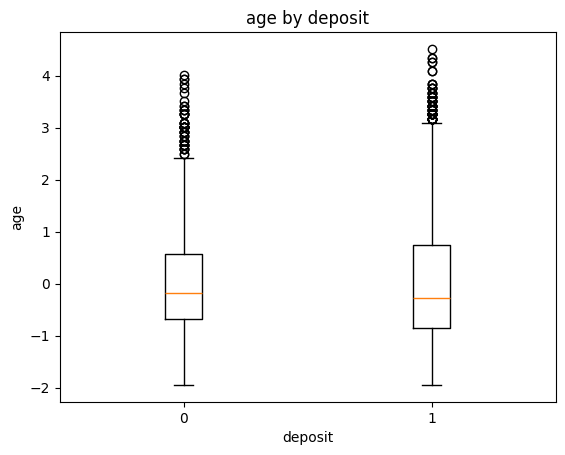

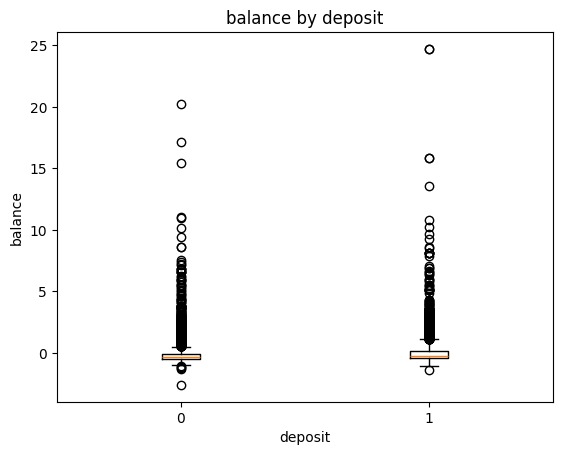

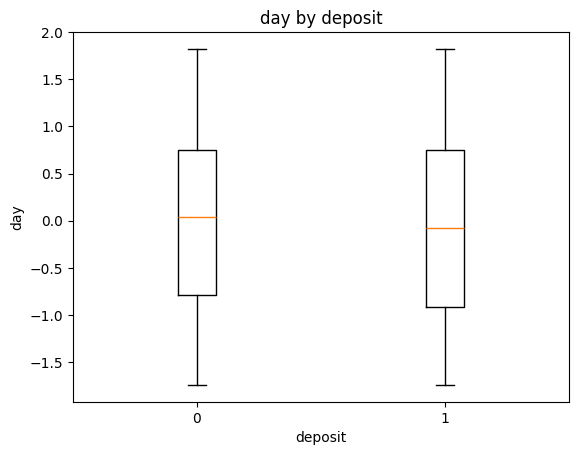

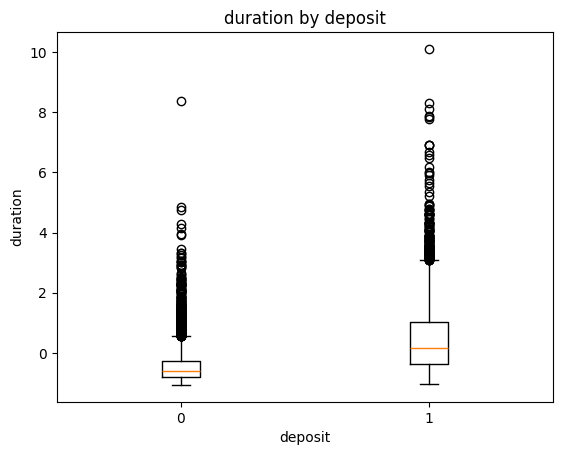

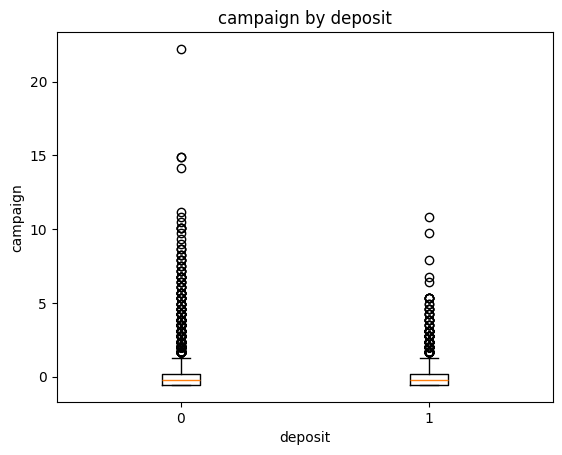

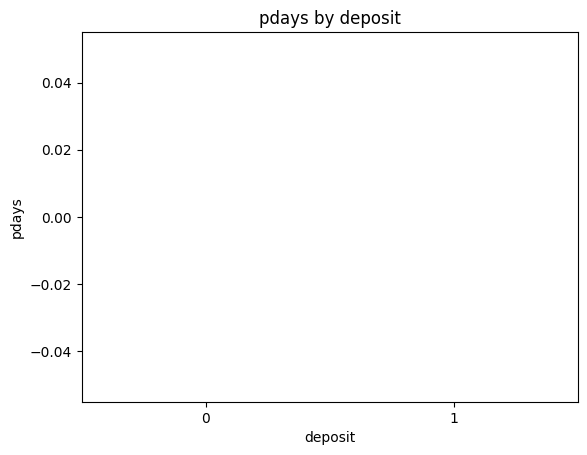

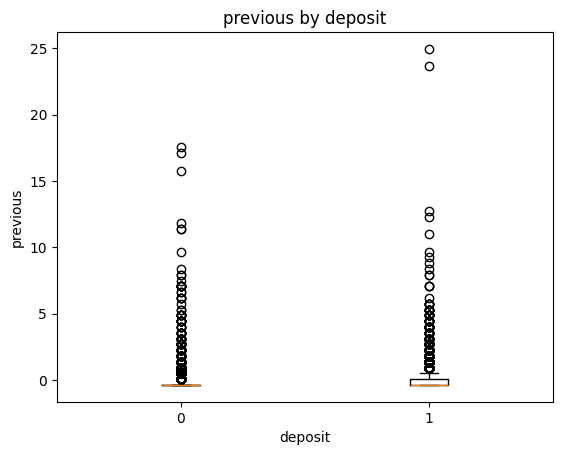

In [28]:
# Map raw target yes/no -> 1/0, then align with cleaned frame for plotting
target_mapped = original_df['deposit'].map({'yes': 1, 'no': 0})
df_for_box = df.copy()
df_for_box['deposit'] = target_mapped.values  # add numeric target column

for col in numeric_cols:
    boxplot_numeric_by_target(df_for_box, col, 'deposit')


## Correlation Heatmap (Cleaned, Numeric Only)

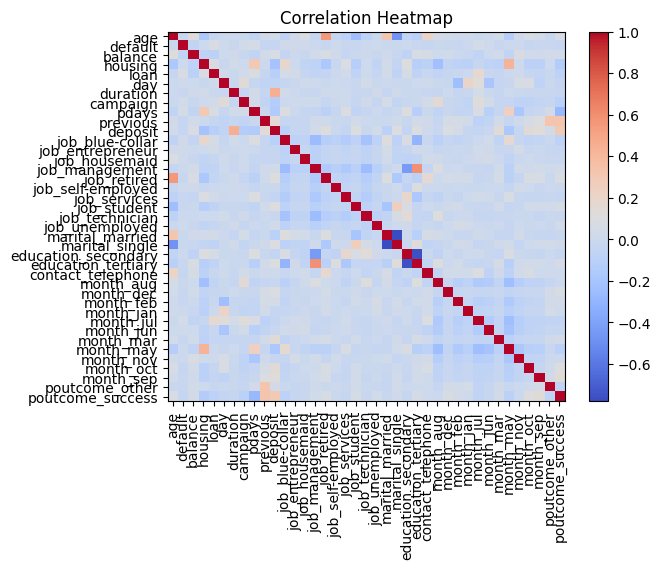

In [29]:
correlation_heatmap(df)

## Monthly Deposit Rate (uses raw 'month' + raw target)

/Users/camille/bank-marketing-analysis/src/visualization.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = tmp.groupby('month')['deposit_num'].mean()


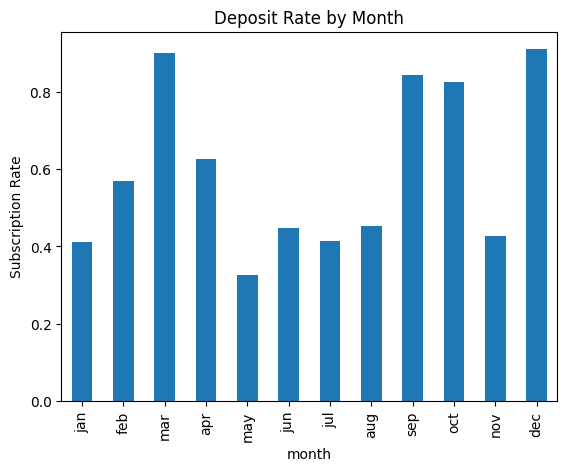

month
jan    0.412791
feb    0.568299
mar    0.898551
apr    0.625135
may    0.327550
jun    0.446809
jul    0.414135
aug    0.452930
sep    0.843260
oct    0.823980
nov    0.427359
dec    0.909091
Name: deposit_num, dtype: float64

In [30]:
rates = monthly_deposit_rate(original_df)
rates

## Quick Notes from EDA

- **Target imbalance:**  
  The dataset is highly imbalanced — only about **11–12%** of clients subscribed to a term deposit (`deposit = yes`).  
  This imbalance should be handled later (e.g., through SMOTE, resampling, or class weights).

- **Call duration is the strongest predictor:**  
  Clients with **longer call durations** are significantly more likely to subscribe.  
  This feature is highly correlated with the target and will play a key role in model performance.

- **Previous campaign success matters:**  
  Customers who had a **successful previous outcome (`poutcome = success`)** are far more likely to subscribe again.

- **Demographics and finance:**  
  - **Education:** Higher education levels (tertiary) show a slightly higher subscription rate.  
  - **Job:** Certain job types (management, technician, admin) have better response rates.  
  - **Balance:** Customers with higher average balances are somewhat more likely to subscribe.

- **Contact and timing factors:**  
  - Contacts made via **cellular** tend to perform better than “unknown” or telephone contacts.  
  - **Months such as May, August, and October** show higher subscription rates — possibly due to marketing timing.

- **Correlations:**  
  The correlation heatmap shows:
  - Strong positive correlation between `duration` and `deposit`.
  - Weak correlation among most other features — suggesting low multicollinearity.

- **Outliers:**  
  - Features like `campaign`, `balance`, and `duration` show skewed distributions with outliers.
  - Outlier handling might improve model stability later.

### Summary
Overall, the EDA confirms:
- Clear class imbalance.
- A few strong predictive variables (`duration`, `poutcome`, `contact`, `month`).
- The dataset is clean and ready for feature selection and classification modeling in the next phase.

